In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH=r'..\data\raw\train.csv'

In [3]:
raw_df=pd.read_csv(DATA_PATH)

In [4]:
raw_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [5]:
raw_df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
raw_df.dropna(inplace=True)
raw_df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

removing outliers

In [7]:
min_longitude=-76#-74.26
max_longitude=-71#-73.70
min_latitude= 39#40.49
max_latitude=42#40.92

In [8]:
mask=(
    (raw_df['pickup_longitude']> max_longitude) | ( raw_df['pickup_longitude']<min_longitude) |
   (raw_df["pickup_latitude"]<min_latitude) | (raw_df['pickup_latitude']>max_latitude ) |
    (raw_df['dropoff_latitude']>max_latitude)  | ( raw_df["dropoff_latitude"]<min_latitude) |
     (raw_df["dropoff_longitude"]<min_longitude) | (raw_df["dropoff_longitude"]>max_longitude)
    )
mask.sum()

1152606

In [9]:
df_new=raw_df[~mask]
df_new.shape

(54270874, 8)

In [10]:
df=df_new.sample(n=5000000, random_state=42)

In [11]:
print(df.shape)
print('duplicated is ',df.duplicated().sum())



(5000000, 8)
duplicated is  0


In [12]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5000000 entries, 36081687 to 54911098
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 343.3+ MB
None


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.132570e+01,-7.397524e+01,4.075093e+01,-7.397436e+01,4.075127e+01,1.685961e+00
std,9.792434e+00,4.094418e-02,3.205876e-02,3.987975e-02,3.537976e-02,1.315691e+00
min,-1.000000e+02,-7.587091e+01,3.907432e+01,-7.587042e+01,3.908873e+01,0.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073656e+01,-7.399159e+01,4.073557e+01,1.000000e+00
50%,8.500000e+00,-7.398208e+01,4.075338e+01,-7.398059e+01,4.075387e+01,1.000000e+00
75%,1.250000e+01,-7.396827e+01,4.076756e+01,-7.396533e+01,4.076840e+01,2.000000e+00
max,3.130300e+03,-7.113012e+01,4.196512e+01,-7.109307e+01,4.199811e+01,2.080000e+02


In [13]:
df['date']=pd.to_datetime(df['key'])
df['year']=df['date'].dt.year
df['month']=df["date"].dt.month
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute




In [14]:
df.drop(["date","key"],axis=1,inplace=True)

In [15]:
df['minute']

36081687    53
52326503    10
40157948    12
48049579    57
35751251    40
            ..
23715168    14
1682763     51
34779612    54
31532428    18
54911098    43
Name: minute, Length: 5000000, dtype: int32

In [16]:
location=['pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude']


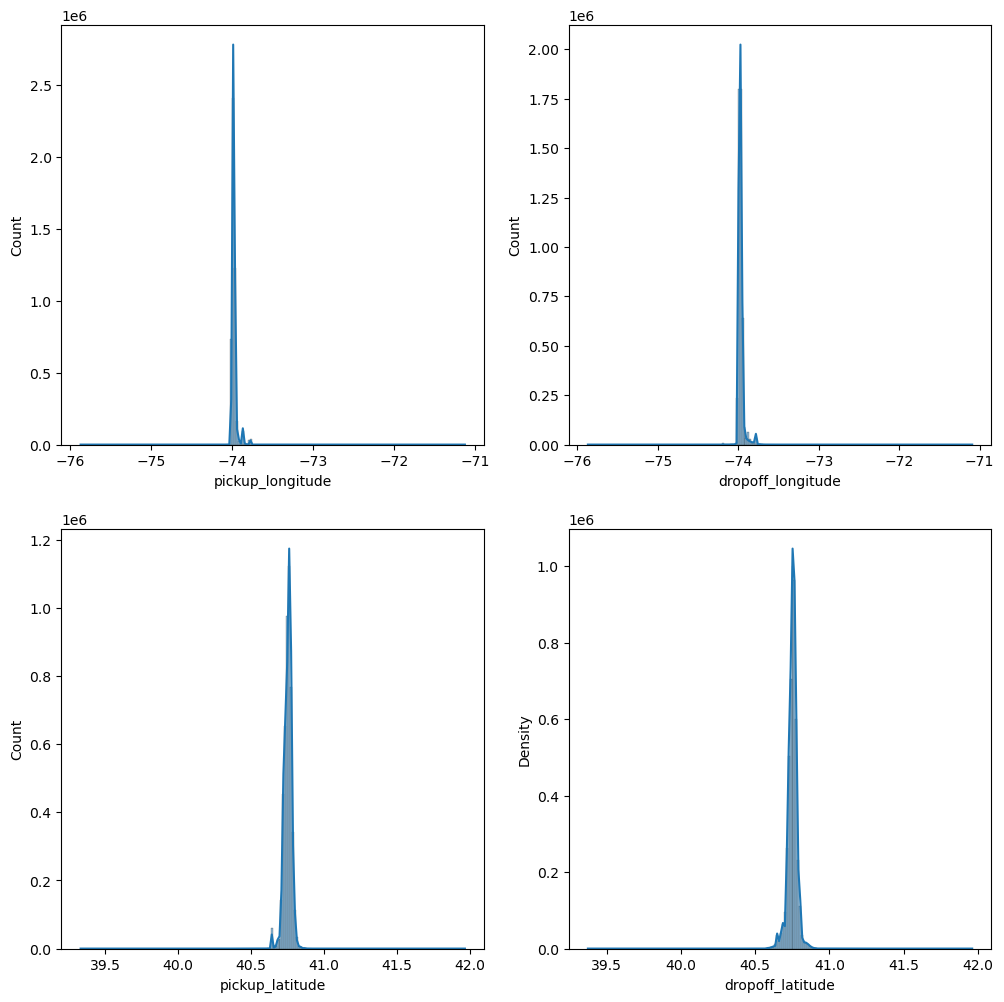

In [49]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
for i ,ax in enumerate(axes.ravel()):
    sns.histplot(df[location[i]],bins=200,kde=True,ax=ax)
    plt.xlabel(location[i])
    plt.ylabel("Density")
    
    


<Axes: xlabel='fare_amount', ylabel='Count'>

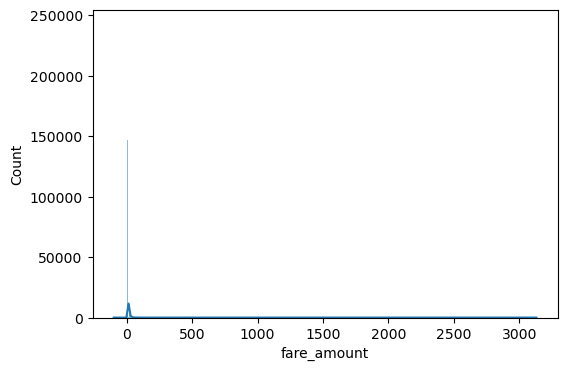

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['fare_amount'],kde=True)

In [19]:
print('num of fare larger than 200 is',(df["fare_amount"]>200).sum())
print('num of fare less than 0 is',(df["fare_amount"]<0).sum())

num of fare larger than 200 is 124
num of fare less than 0 is 217


In [20]:
df=df[(df["fare_amount"]<200 )& (df["fare_amount"]>.5)]

In [21]:
df.shape

(4999461, 12)

<Axes: xlabel='fare_amount', ylabel='Count'>

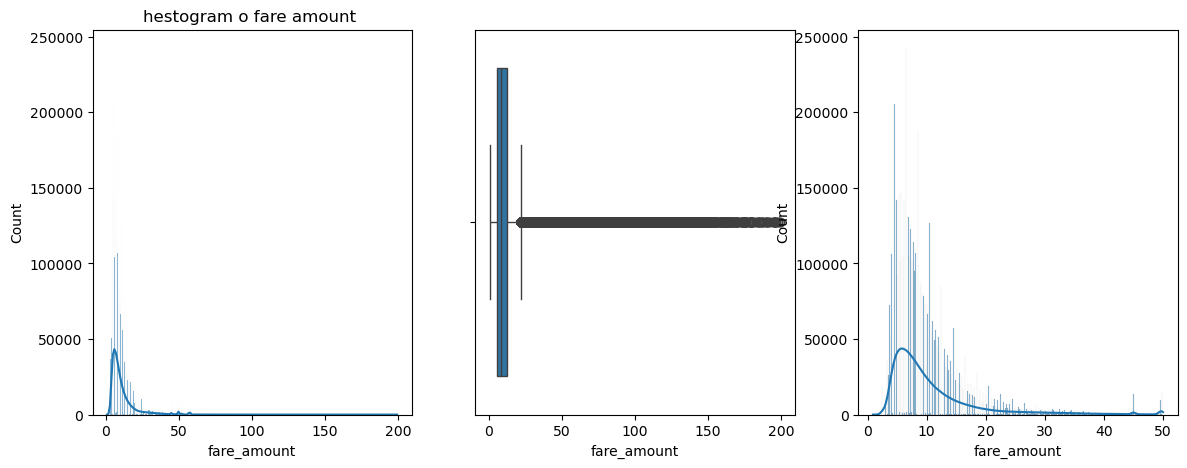

In [22]:
fig,axes=plt.subplots(1,3,figsize=(14,5))
sns.histplot(data=df,x='fare_amount',kde=True,ax=axes[0])
axes[0].set_title('hestogram o fare amount ' )

sns.boxplot(data=df,x='fare_amount',ax=axes[1])

sns.histplot(data=df[df["fare_amount"]<50],x='fare_amount',kde=True,ax=axes[2])



In [23]:
passenger_counts=df['passenger_count'].value_counts().sort_index()
passenger_counts

passenger_count
0        17335
1      3457242
2       737853
3       219364
4       106695
5       355110
6       105857
7            2
9            1
208          2
Name: count, dtype: int64

C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_1472\484716493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passenger_counts.index, y=passenger_counts.values, palette='viridis',ax=axes[0])


Text(0.5, 1.0, 'Passenger Count Distribution (Pie Chart)')

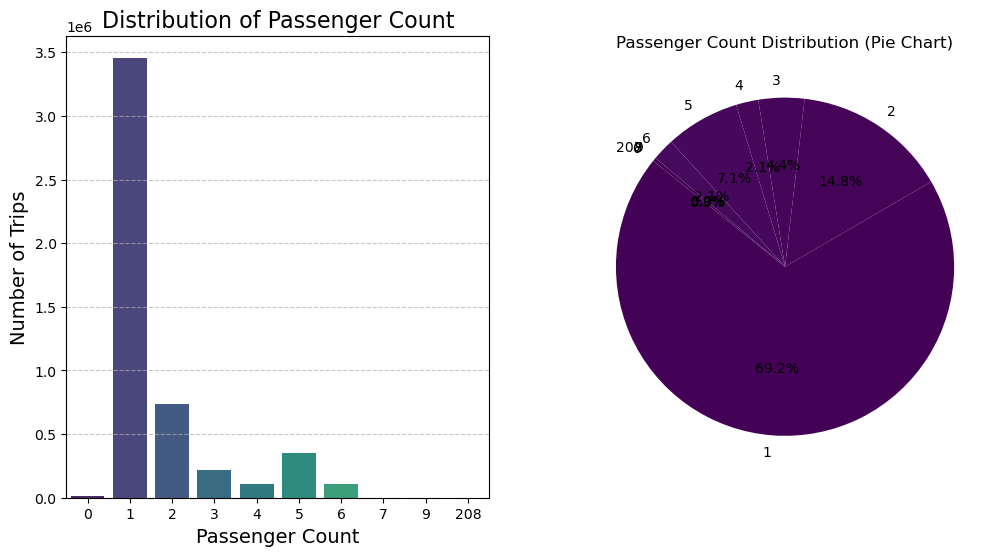

In [24]:
fig ,axes=plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values, palette='viridis',ax=axes[0])
axes[0].set_title('Distribution of Passenger Count', fontsize=16)
axes[0].set_xlabel('Passenger Count', fontsize=14)
axes[0].set_ylabel('Number of Trips', fontsize=14)
# plt.xticks(rotation=1)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].pie(passenger_counts.values, labels=passenger_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)

axes[1].set_title("Passenger Count Distribution (Pie Chart)")


In [25]:
df=df[~df['passenger_count'].isin([0,7,9,208])]

1 passenger is very large i think we can cluster it and do some feature engineering on it 

In [26]:
passenger_counts=df['passenger_count'].value_counts().sort_index()
passenger_counts

passenger_count
1    3457242
2     737853
3     219364
4     106695
5     355110
6     105857
Name: count, dtype: int64

In [27]:
years=df['year'].value_counts().sort_index()
print(years)
months=df['month'].value_counts().sort_index()
print(months)
hours=df['hour'].value_counts().sort_index()
print(hours)

year
2009    776000
2010    752896
2011    784409
2012    796268
2013    781484
2014    743452
2015    347612
Name: count, dtype: int64
month
1     444614
2     418265
3     466904
4     458753
5     468542
6     447604
7     377107
8     355503
9     380044
10    403020
11    378433
12    383332
Name: count, dtype: int64
hour
0     196881
1     146150
2     108789
3      79853
4      57879
5      48609
6     101800
7     179798
8     225463
9     232874
10    224703
11    232117
12    245671
13    243198
14    251897
15    239406
16    205117
17    246869
18    300265
19    311580
20    293409
21    285381
22    276701
23    247711
Name: count, dtype: int64


C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_1472\51282444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years.index,y=years.values,palette='viridis',ax=axes[0])
C:\Users\Mohamed Mosaad\AppData\Local\Temp\ipykernel_1472\51282444.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months.index,y=months.values,palette='viridis',ax=axes[1])


<Axes: xlabel='hour', ylabel='Count'>

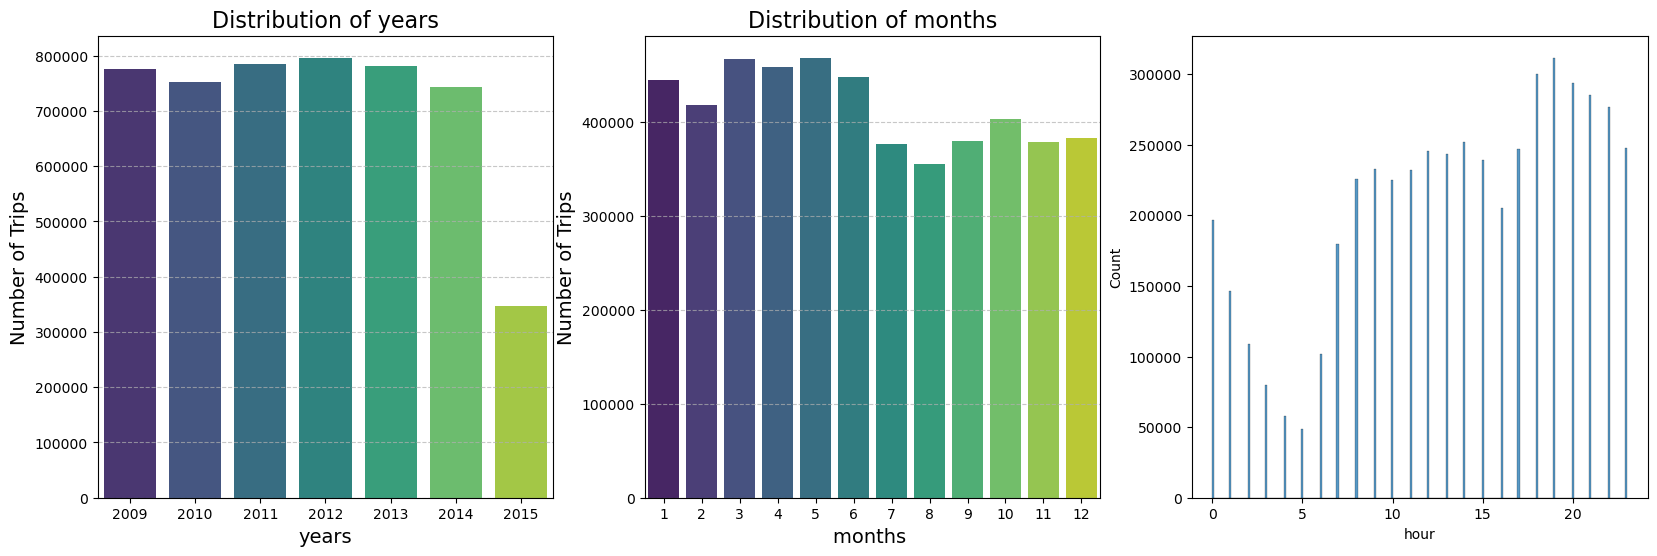

In [28]:
fig,axes=plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=years.index,y=years.values,palette='viridis',ax=axes[0])
axes[0].set_title('Distribution of years', fontsize=16)
axes[0].set_xlabel('years', fontsize=14)
axes[0].set_ylabel('Number of Trips', fontsize=14)
# plt.xticks(rotation=1)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


sns.barplot(x=months.index,y=months.values,palette='viridis',ax=axes[1])
axes[1].set_title('Distribution of months', fontsize=16)
axes[1].set_xlabel('months ', fontsize=14)
axes[1].set_ylabel('Number of Trips', fontsize=14)
# plt.xticks(rotation=1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df,x='hour')

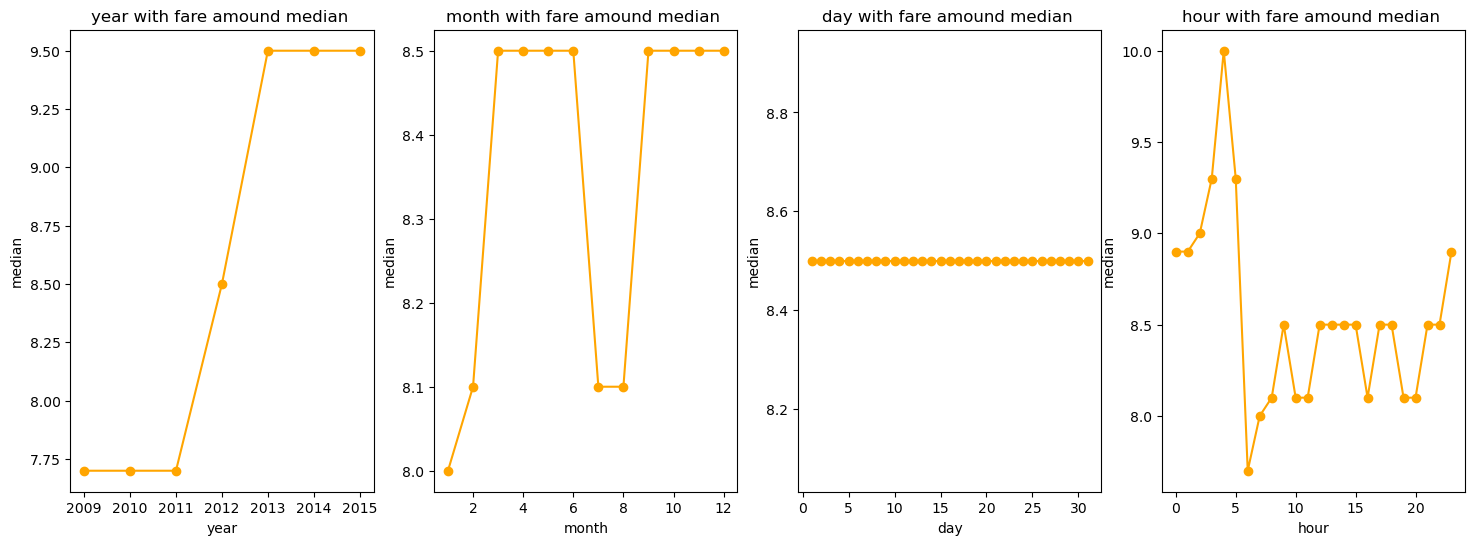

In [29]:
group_date=['year','month','day','hour']
fig,axes=plt.subplots(1,4,figsize=(18,6))
for i,ax in enumerate(axes.ravel()):
          df.groupby(group_date[i])['fare_amount'].median().plot(kind='line',marker='o',color='orange',ax=ax)
          ax.set_title(f'{group_date[i]} with fare amound median ')
          ax.set_xlabel(group_date[i])
          ax.set_ylabel('median')
          

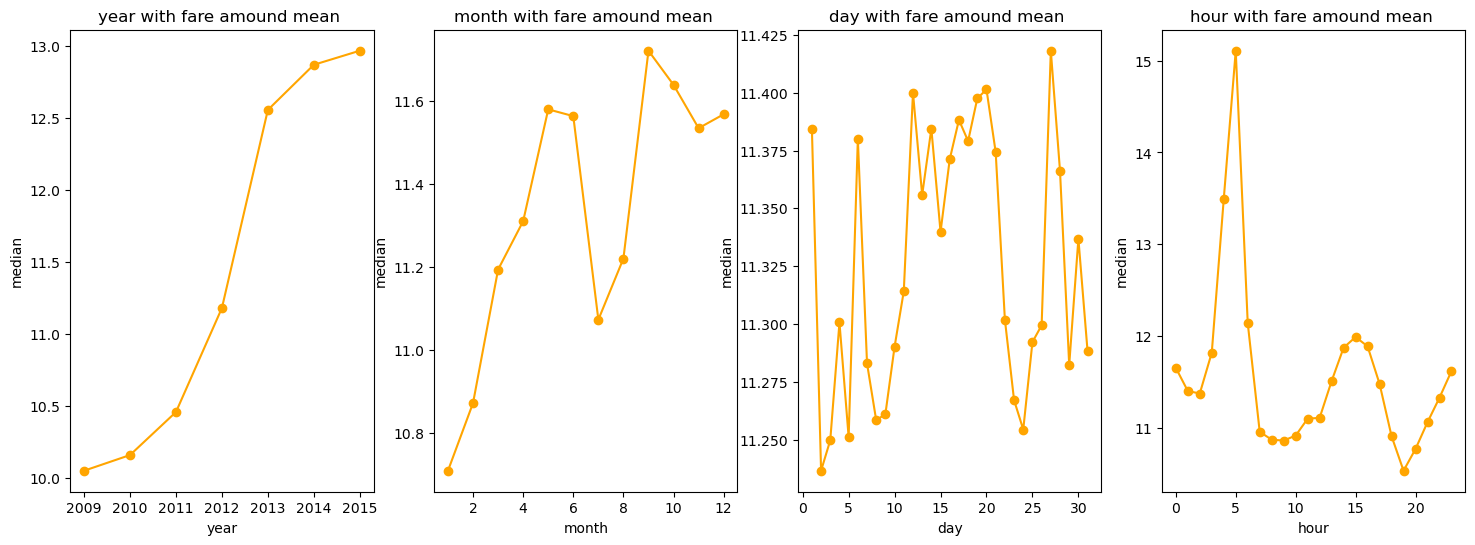

In [30]:
group_date=['year','month','day','hour']
fig,axes=plt.subplots(1,4,figsize=(18,6))
for i,ax in enumerate(axes.ravel()):
          df.groupby(group_date[i])['fare_amount'].mean().plot(kind='line',marker='o',color='orange',ax=ax)
          ax.set_title(f'{group_date[i]} with fare amound mean ')
          ax.set_xlabel(group_date[i])
          ax.set_ylabel('median')

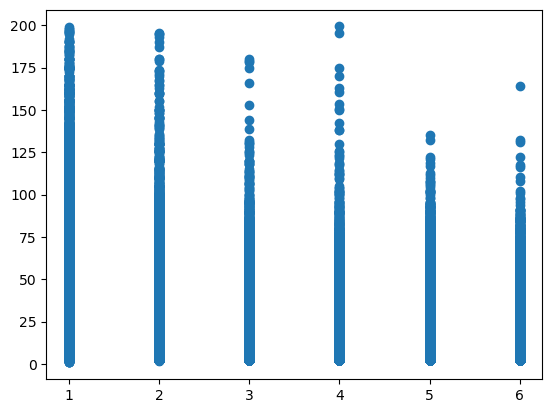

In [31]:
plt.scatter(df["passenger_count"],df['fare_amount'])

some feature engineering

In [ ]:
def harvesine_dis(lon1,lat1,lon2,lat2):
    R = 6371  # Earth radius in kilometers

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

def euclidean_distance(lon1, lat1, lon2, lat2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

def add_dis(df):
    df["trip_harv_dis"]=harvesine_dis(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)
    df["trip_euclian_dis"]=euclidean_distance(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)



In [33]:
add_dis(df)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,trip_harv_dis,trip_euclian_dis
36081687,13.0,2015-04-28 14:53:14 UTC,-73.963570,40.771313,-73.978333,40.751076,1,2015,4,28,14,53,2.570915,0.025050
52326503,24.5,2013-03-16 22:10:15 UTC,-73.985932,40.778404,-73.996953,40.722665,2,2013,3,16,22,10,6.267038,0.056818
40157948,6.9,2010-07-30 23:12:10 UTC,-74.008468,40.720306,-73.991503,40.736797,1,2010,7,30,23,12,2.325107,0.023659
48049579,8.5,2012-11-27 20:57:00 UTC,-73.970175,40.753165,-73.993177,40.746402,6,2012,11,27,20,57,2.078449,0.023976
35751251,16.0,2012-11-09 16:40:44 UTC,-73.959817,40.782076,-73.977885,40.736664,1,2012,11,9,16,40,5.273911,0.048874


<Axes: xlabel='trip_euclian_dis'>

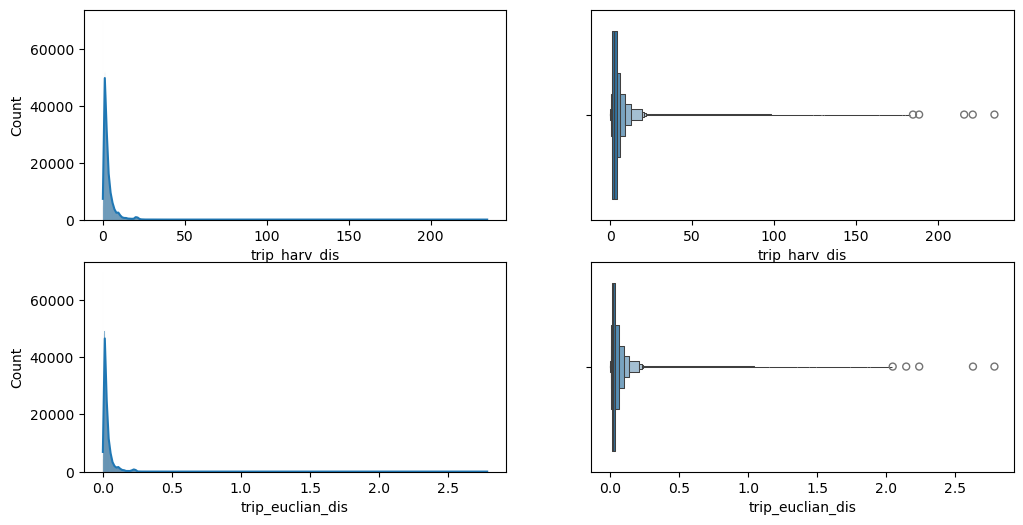

In [34]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
sns.histplot(df,x='trip_harv_dis' ,kde=True,ax=axes[0][0])
sns.boxenplot(data=df,x='trip_harv_dis',ax=axes[0][1])

sns.histplot(df,x='trip_euclian_dis' ,kde=True,ax=axes[1][0])
sns.boxenplot(data=df,x='trip_euclian_dis',ax=axes[1][1])



In [35]:
print((df["trip_harv_dis"]>50).sum())
print((df["trip_harv_dis"]==0).sum())


1775
52816


In [36]:
df[df["trip_harv_dis"]==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,trip_harv_dis,trip_euclian_dis
19338005,14.9,2010-10-02 20:30:08 UTC,-73.973516,40.683214,-73.973516,40.683214,1,2010,10,2,20,30,0.0,0.0
4075723,27.3,2010-05-04 13:37:25 UTC,-73.930904,40.830199,-73.930904,40.830199,1,2010,5,4,13,37,0.0,0.0
858201,19.0,2014-05-25 11:41:18 UTC,-74.003831,40.776848,-74.003831,40.776848,1,2014,5,25,11,41,0.0,0.0
24873568,4.1,2011-10-29 16:23:00 UTC,-73.982276,40.770374,-73.982276,40.770374,4,2011,10,29,16,23,0.0,0.0
51911621,2.5,2012-02-22 10:47:35 UTC,-73.948998,40.744917,-73.948998,40.744917,2,2012,2,22,10,47,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50201991,7.5,2009-01-16 19:31:25 UTC,-73.937353,40.789383,-73.937353,40.789383,1,2009,1,16,19,31,0.0,0.0
33120648,4.1,2009-12-30 22:06:00 UTC,-73.987892,40.745882,-73.987892,40.745882,4,2009,12,30,22,6,0.0,0.0
55406025,4.5,2011-06-21 19:29:00 UTC,-73.977423,40.784407,-73.977423,40.784407,1,2011,6,21,19,29,0.0,0.0
27309320,11.5,2012-11-21 16:40:20 UTC,-73.972765,40.771987,-73.972765,40.771987,1,2012,11,21,16,40,0.0,0.0


In [37]:
df=df[(df['trip_harv_dis']<50) &(df['trip_harv_dis']!=0) ]
df.shape

(4927530, 14)

<Axes: xlabel='trip_euclian_dis'>

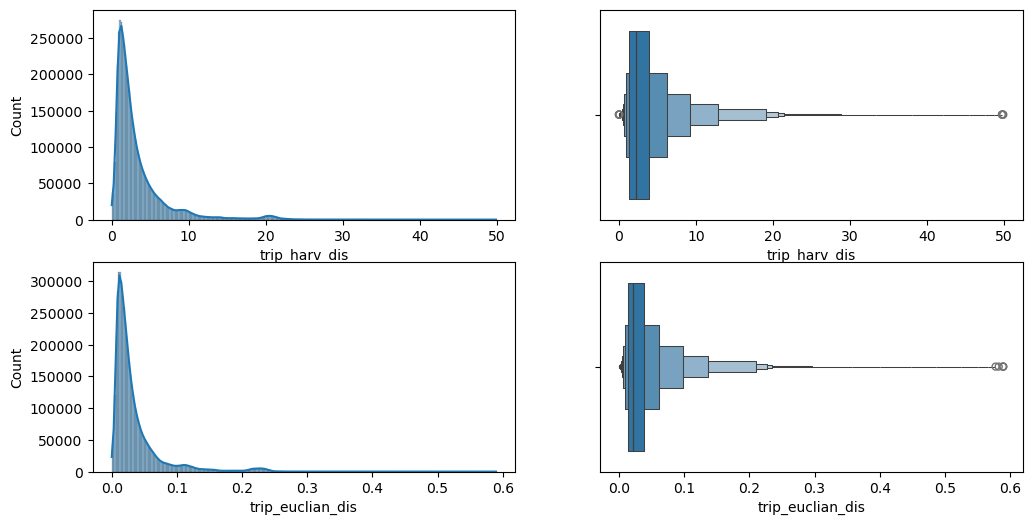

In [38]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
sns.histplot(df,x='trip_harv_dis' ,kde=True,bins=300,ax=axes[0][0])
sns.boxenplot(data=df,x='trip_harv_dis',ax=axes[0][1])

sns.histplot(df,x='trip_euclian_dis' ,kde=True,bins=300,ax=axes[1][0])
sns.boxenplot(data=df,x='trip_euclian_dis',ax=axes[1][1])

In [39]:
df["fare/km"] = round((df["fare_amount"] / df['trip_harv_dis']),2)
df["fare/km"]


36081687    5.06
52326503    3.91
40157948    2.97
48049579    4.09
35751251    3.03
            ... 
23715168    3.91
1682763     4.20
34779612    4.66
31532428    4.16
54911098    5.76
Name: fare/km, Length: 4927530, dtype: float64

In [40]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,trip_harv_dis,trip_euclian_dis,fare/km
36081687,13.0,2015-04-28 14:53:14 UTC,-73.963570,40.771313,-73.978333,40.751076,1,2015,4,28,14,53,2.570915,0.025050,5.06
52326503,24.5,2013-03-16 22:10:15 UTC,-73.985932,40.778404,-73.996953,40.722665,2,2013,3,16,22,10,6.267038,0.056818,3.91
40157948,6.9,2010-07-30 23:12:10 UTC,-74.008468,40.720306,-73.991503,40.736797,1,2010,7,30,23,12,2.325107,0.023659,2.97
48049579,8.5,2012-11-27 20:57:00 UTC,-73.970175,40.753165,-73.993177,40.746402,6,2012,11,27,20,57,2.078449,0.023976,4.09
35751251,16.0,2012-11-09 16:40:44 UTC,-73.959817,40.782076,-73.977885,40.736664,1,2012,11,9,16,40,5.273911,0.048874,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23715168,26.0,2014-02-13 09:14:18 UTC,-73.971071,40.793042,-73.993785,40.735692,1,2014,2,13,9,14,6.657769,0.061684,3.91
1682763,16.0,2015-02-17 12:51:14 UTC,-73.988289,40.758099,-73.948479,40.774315,1,2015,2,17,12,51,3.806827,0.042986,4.20
34779612,4.5,2011-05-07 00:54:00 UTC,-73.984467,40.742635,-73.992980,40.736825,5,2011,5,7,0,54,0.965288,0.010307,4.66
31532428,14.0,2012-09-10 16:18:00 UTC,-73.954360,40.765430,-73.991362,40.754072,6,2012,9,10,16,18,3.362675,0.038706,4.16


<Axes: xlabel='fare/km', ylabel='Count'>

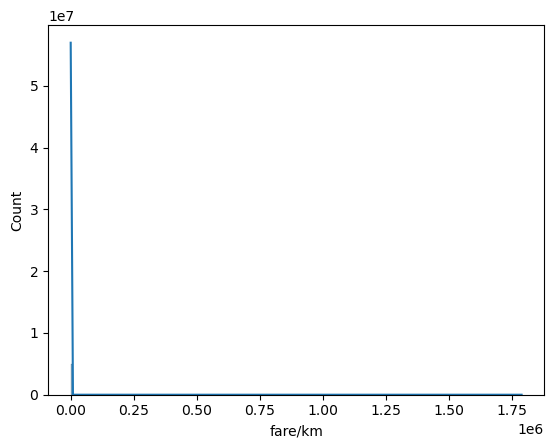

In [41]:
sns.histplot(df,x='fare/km' ,kde=True,bins=300)


In [42]:
(df["fare/km"]>10).sum()
df.drop(df[df["fare/km"]>10].index, axis=0, inplace=True)


<Axes: ylabel='fare/km'>

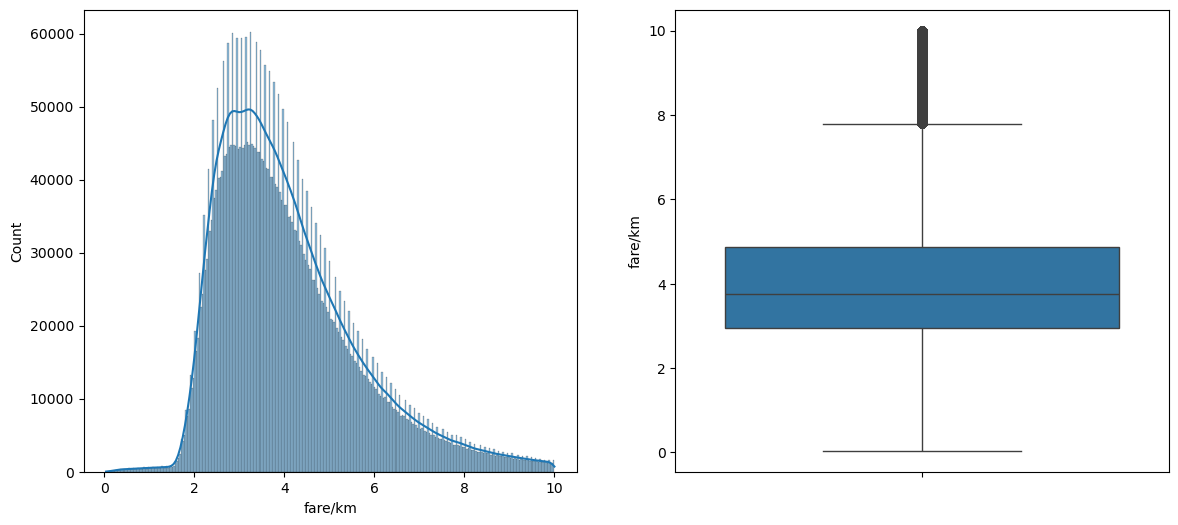

In [43]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.histplot(df,x='fare/km' ,kde=True,bins=300,ax=axes[0])
sns.boxplot(y=df['fare/km'], ax=axes[1])


In [44]:
yearly_price_per_km = df.groupby("year")["fare/km"].median().reset_index()  
monthly_price_per_km = df.groupby("month")["fare/km"].median().reset_index()  
dayofweek_price_per_km = df.groupby("day")["fare/km"].median().reset_index()  
hourly_price_per_km = df.groupby("hour")["fare/km"].median().reset_index() 

In [45]:
yearly_price_per_km

,year,fare/km
0,2009,3.50
1,2010,3.45
2,2011,3.48
3,2012,3.65
4,2013,4.08
5,2014,4.17
6,2015,4.26


In [47]:
yearly_price_per_km.rename(columns={"fare/km": "yearly_price_per_km"}, inplace=True)  
monthly_price_per_km.rename(columns={"fare/km": "monthly_price_per_km"}, inplace=True) 
dayofweek_price_per_km.rename(columns={"fare/km": "dayofweek_price_per_km"}, inplace=True)  
hourly_price_per_km.rename(columns={"fare/km": "hourly_price_per_km"}, inplace=True)  
   
df = df.merge(yearly_price_per_km, on="year", how="left")  
df = df.merge(monthly_price_per_km, on="month", how="left")  
df = df.merge(dayofweek_price_per_km, on="day", how="left")  
df = df.merge(hourly_price_per_km, on="hour", how="left")   

In [48]:
yearly_fare = df.groupby("year")["fare_amount"].mean().round(2).reset_index()
monthly_fare = df.groupby("month")["fare_amount"].mean().round(2).reset_index()
weekly_fare = df.groupby("day")["fare_amount"].mean().round(2).reset_index()
hourly_fare = df.groupby("hour")["fare_amount"].mean().round(2).reset_index()


yearly_fare.rename(columns={"fare_amount": "yearly_fare"}, inplace=True)  
monthly_fare.rename(columns={"fare_amount": "monthly_fare"}, inplace=True)  
weekly_fare.rename(columns={"fare_amount": "weekly_fare"}, inplace=True)  
hourly_fare.rename(columns={"fare_amount": "hourly_fare"}, inplace=True)  
  

df = df.merge(yearly_fare, on="year", how="left")  
df = df.merge(monthly_fare, on="month", how="left")  
df = df.merge(weekly_fare, on="day", how="left")  
df = df.merge(hourly_fare, on="hour", how="left")  

In [50]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,...,yearly_price_per_km_x,monthly_price_per_km_x,yearly_price_per_km_y,monthly_price_per_km_y,dayofweek_price_per_km,hourly_price_per_km,yearly_fare,monthly_fare,weekly_fare,hourly_fare
0,13.0,2015-04-28 14:53:14 UTC,-73.963570,40.771313,-73.978333,40.751076,1,2015,4,28,...,4.26,3.76,4.26,3.76,3.76,4.08,13.05,11.32,11.38,11.90
1,24.5,2013-03-16 22:10:15 UTC,-73.985932,40.778404,-73.996953,40.722665,2,2013,3,16,...,4.08,3.76,4.08,3.76,3.75,3.45,12.63,11.19,11.36,11.29
2,6.9,2010-07-30 23:12:10 UTC,-74.008468,40.720306,-73.991503,40.736797,1,2010,7,30,...,3.45,3.63,3.45,3.63,3.76,3.39,10.03,11.09,11.33,11.58
3,8.5,2012-11-27 20:57:00 UTC,-73.970175,40.753165,-73.993177,40.746402,6,2012,11,27,...,3.65,3.82,3.65,3.82,3.76,3.63,11.20,11.55,11.43,10.75
4,16.0,2012-11-09 16:40:44 UTC,-73.959817,40.782076,-73.977885,40.736664,1,2012,11,9,...,3.65,3.82,3.65,3.82,3.77,3.91,11.20,11.55,11.24,11.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759545,26.0,2014-02-13 09:14:18 UTC,-73.971071,40.793042,-73.993785,40.735692,1,2014,2,13,...,4.17,3.79,4.17,3.79,3.77,4.10,12.91,10.87,11.34,10.90
4759546,16.0,2015-02-17 12:51:14 UTC,-73.988289,40.758099,-73.948479,40.774315,1,2015,2,17,...,4.26,3.79,4.26,3.79,3.75,4.13,13.05,10.87,11.38,11.15
4759547,4.5,2011-05-07 00:54:00 UTC,-73.984467,40.742635,-73.992980,40.736825,5,2011,5,7,...,3.48,3.75,3.48,3.75,3.78,3.33,10.42,11.59,11.29,11.61
4759548,14.0,2012-09-10 16:18:00 UTC,-73.954360,40.765430,-73.991362,40.754072,6,2012,9,10,...,3.65,3.79,3.65,3.79,3.77,3.91,11.20,11.62,11.28,11.89


In [51]:
import pickle

In [53]:
EXPORT_PATH="..\data\processed\dataframe.pkl"
df.to_pickle(EXPORT_PATH)
EXPORT_PATH

'..\\data\\processed\\dataframe.pkl'

In [65]:
fare_with_date=['yearly_price_per_km','monthly_price_per_km','yearly_fare','monthly_fare']
dates=['year','month','year','month']
fare_with_dates=[yearly_price_per_km,monthly_price_per_km,yearly_fare,monthly_fare]


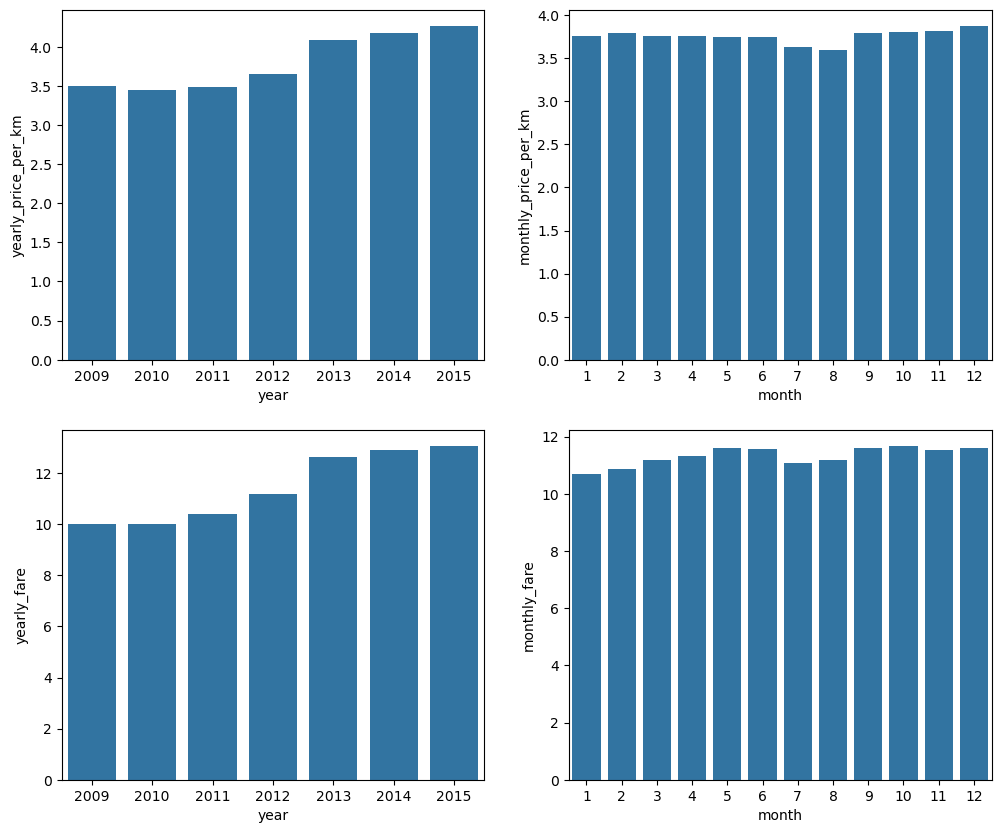

In [66]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
for i ,ax in enumerate(axes.ravel()):
    sns.barplot(fare_with_dates[i],x=dates[i],y=fare_with_date[i],ax=ax)

In [ ]:
EXPORT_PATH="..\data\processed\yearly_fare.pkl"
yearly_fare.to_pickle(EXPORT_PATH)
EXPORT_PATH

EXPORT_PATH="..\data\processed\monthly_fare.pkl"
monthly_fare.to_pickle(EXPORT_PATH)
EXPORT_PATH

EXPORT_PATH="..\data\processed\yearly_price_per_km.pkl"
yearly_price_per_km.to_pickle(EXPORT_PATH)
EXPORT_PATH

EXPORT_PATH="..\data\processed\monthly_price_per_km.pkl"
monthly_price_per_km.to_pickle(EXPORT_PATH)
EXPORT_PATH


'..\\data\\processed\\monthly_price_per_km.pkl'

In [68]:

EXPORT_PATH="..\data\processed\hourly_fare.pkl"
hourly_fare.to_pickle(EXPORT_PATH)
EXPORT_PATH

'..\\data\\processed\\hourly_fare.pkl'